In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
test = tf.keras.applications.MobileNetV3Small(
    input_shape=(180,180,3),
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

test.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 180, 180, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 90, 90, 16)   432         ['rescaling[0][0]']              
                                                                                                  
 Conv/BatchNorm (BatchNormaliza  (None, 90, 90, 16)  64          ['Conv[0][0]']    

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [4]:
img_count = len(list(data_dir.glob('*/*.jpg')))
print(img_count)

3670


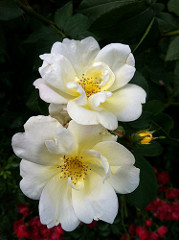

In [5]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

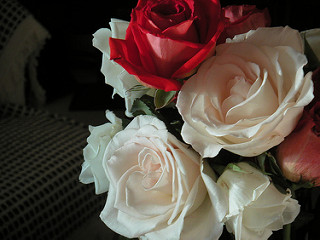

In [6]:
PIL.Image.open(str(roses[1]))

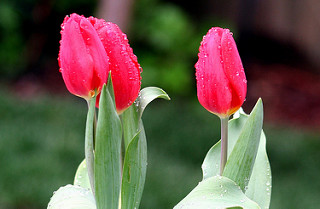

In [7]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

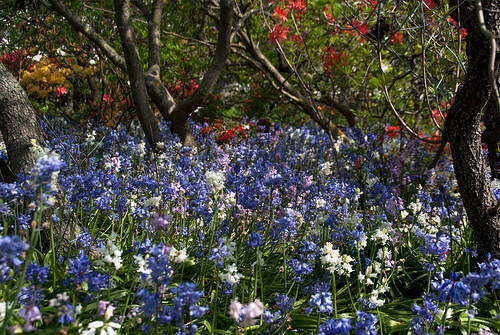

In [8]:
PIL.Image.open(str(tulips[1]))

In [9]:
batch_size = 32
img_height = 180
img_width = 180

In [10]:
#validation split

train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123, image_size=(img_height, img_width), batch_size = batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation",seed=123,image_size=(img_height,img_width), batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


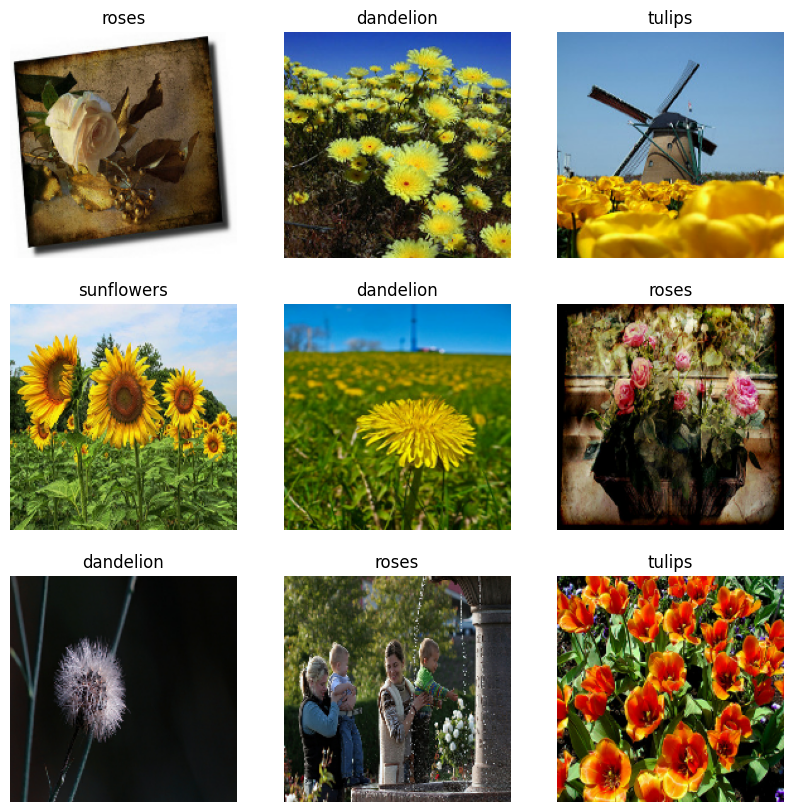

In [13]:
from matplotlib.pyplot import subplot


plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [14]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break
hold_image = image_batch.numpy()
hold_label = labels_batch.numpy()
print(hold_image)
print(hold_label) 

(32, 180, 180, 3)
(32,)
[[[[8.83888855e+01 1.24388885e+02 2.00388885e+02]
   [8.89277802e+01 1.24927780e+02 2.00927780e+02]
   [8.88342590e+01 1.25369446e+02 1.99212967e+02]
   ...
   [2.14580017e+02 8.65392227e+01 2.93608099e-01]
   [2.33405533e+02 1.02674973e+02 5.17222071e+00]
   [2.28703690e+02 9.76851730e+01 2.50831127e+00]]

  [[9.02777786e+01 1.26277779e+02 2.02277786e+02]
   [9.08666611e+01 1.27150002e+02 2.03008331e+02]
   [9.50527802e+01 1.33036102e+02 2.06155548e+02]
   ...
   [1.61444641e+02 6.94110336e+01 9.16383362e+00]
   [1.72708313e+02 6.47249908e+01 1.37494326e+00]
   [1.53869415e+02 6.37055588e+01 4.15557909e+00]]

  [[9.30277786e+01 1.31027786e+02 2.06027786e+02]
   [9.27500000e+01 1.30819443e+02 2.05819443e+02]
   [9.83518524e+01 1.37162033e+02 2.09879623e+02]
   ...
   [1.18514069e+02 5.96759567e+01 8.26373959e+00]
   [1.67694916e+02 1.02569954e+02 4.29171982e+01]
   [2.26222305e+02 1.90916809e+02 1.68245605e+02]]

  ...

  [[8.00000458e+01 1.02430565e+02 3.508800

In [15]:
#pre-processing
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

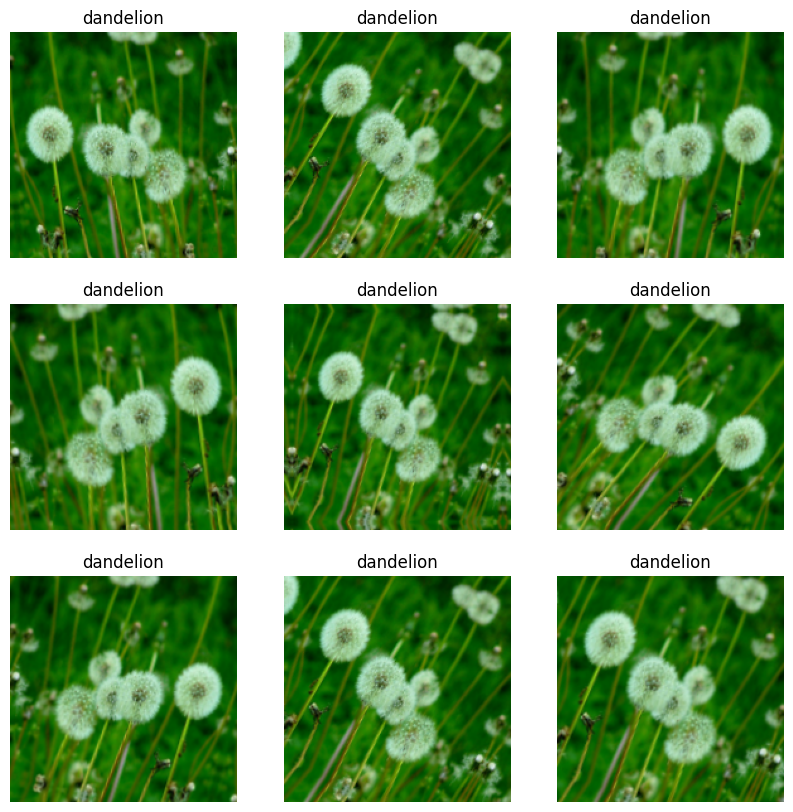

In [16]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    first_image = images[0]
    for i in range(9):
        
        ax = subplot(3, 3, i+1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

In [17]:
num_classes = len(class_names)
mobilenetV3_small_model = tf.keras.applications.MobileNetV3Small(
    weights="imagenet",
    input_shape=(180, 180, 3),
    include_top=False,
    #classifier_activation="softmax",
    #classes = num_classes,

)



#mobilenetV3_large_model.trainable = False

#inputs = keras.Input(shape=(180,180,3))
#x = data_augmentation(inputs)

#scale_layer = keras.layers.Rescaling(scale= 1 / 127.5, offset=-1)
#x = scale_layer(x)

#x = mobilenetV3_large_model(x, training=False)
#x = keras.layers.GlobalAveragePooling2D()(x)
#x = keras.layers.Dropout(0.2)(x)
#outputs = keras.layers.Dense(1)(x)
#model = keras.Model(inputs, outputs)

###### - alternative method

x = mobilenetV3_small_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
preds = layers.Dense(9, activation='softmax')(x)

model = keras.Model(inputs=mobilenetV3_small_model.input, outputs=preds)

model.summary()


4334752/4334752 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 180, 180, 3)  0           ['input_2[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 90, 90, 16)   432         ['rescaling_1[0][0]']            
                                                                                                  
 Conv/BatchNorm (BatchNormaliza

In [18]:
for layers in model.layers[:-5]:
    layers.trainable = False

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 180, 180, 3)  0           ['input_2[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 90, 90, 16)   432         ['rescaling_1[0][0]']            
                                                                                                  
 Conv/BatchNorm (BatchNormaliza  (None, 90, 90, 16)  64          ['Conv[0][0]']               

In [19]:
model.compile(
            loss='sparse_categorical_crossentropy',
            optimizer=keras.optimizers.Adam(learning_rate=.0001),
            #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']
)

epochs = 20
result = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
92/92 [==============================] - 20s 188ms/step - loss: 1.0793 - accuracy: 0.6304 - val_loss: 0.6034 - val_accuracy: 0.7997
Epoch 2/20
92/92 [==============================] - 16s 177ms/step - loss: 0.4808 - accuracy: 0.8382 - val_loss: 0.4641 - val_accuracy: 0.8297
Epoch 3/20
92/92 [==============================] - 17s 187ms/step - loss: 0.3649 - accuracy: 0.8760 - val_loss: 0.3986 - val_accuracy: 0.8474
Epoch 4/20
92/92 [==============================] - 17s 182ms/step - loss: 0.2987 - accuracy: 0.9060 - val_loss: 0.3657 - val_accuracy: 0.8610
Epoch 5/20
92/92 [==============================] - 16s 177ms/step - loss: 0.2507 - accuracy: 0.9169 - val_loss: 0.3535 - val_accuracy: 0.8651
Epoch 6/20
92/92 [==============================] - 16s 176ms/step - loss: 0.2085 - accuracy: 0.9349 - val_loss: 0.3495 - val_accuracy: 0.8801
Epoch 7/20
92/92 [==============================] - 16s 176ms/step - loss: 0.1769 - accuracy: 0.9448 - val_loss: 0.3231 - val_accuracy: 0.8760

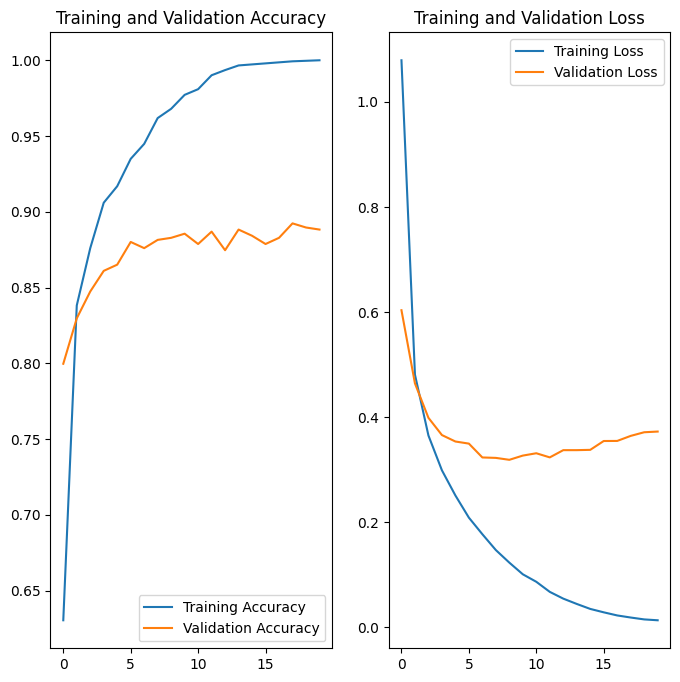

In [20]:
accuracy = result.history["accuracy"]
val_accuracy = result.history["val_accuracy"]

loss = result.history["loss"]
val_loss = result.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"

#sunflower_path = tf.keras.utils.get_file('sunflower-1627193_1280', origin="C:/Users/joshu/Downloads/sunflower-1627193_1280.jpg")

img = tf.keras.utils.load_img(
    "C:/Users/joshua/Downloads/sunflower-1627193_1280.jpg", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
pred = np.argmax(predictions, axis=-1)
print(class_names[pred[0]])
print(predictions)
score = tf.nn.softmax(predictions[0])
print(score)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 1s 1s/step
sunflowers
[[4.3477862e-06 3.1774162e-04 4.1119010e-06 9.9966776e-01 5.7451075e-06
  1.5999950e-08 6.2781718e-09 2.6344350e-07 6.7516147e-08]]
tf.Tensor(
[0.0933039  0.09333315 0.09330388 0.25354096 0.09330403 0.0933035
 0.0933035  0.09330352 0.0933035 ], shape=(9,), dtype=float32)
This image most likely belongs to sunflowers with a 25.35 percent confidence.


In [23]:
from pathlib import Path
output = Path.cwd() / "saved_models" / "MobileNetV3Small"
model.save(output)

INFO:tensorflow:Assets written to: e:\Joshua\Documents\Uni\COMP4092\obj_model_training\saved_models\MobileNetV3Small\assets


INFO:tensorflow:Assets written to: e:\Joshua\Documents\Uni\COMP4092\obj_model_training\saved_models\MobileNetV3Small\assets


In [24]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_seq_model = converter.convert()

with open('saved_models/tfLite_mobilenetv3S_flowers.tflite', 'wb') as f:
    f.write(tflite_seq_model)

INFO:tensorflow:Assets written to: C:\Users\Joshua\AppData\Local\Temp\tmp6msp7olj\assets


INFO:tensorflow:Assets written to: C:\Users\Joshua\AppData\Local\Temp\tmp6msp7olj\assets


In [25]:
TFLITE_MODEL_FILE_PATH = 'saved_models/tfLite_mobilenetv3S_flowers.tflite'

model_interpreter = tf.lite.Interpreter(model_path= TFLITE_MODEL_FILE_PATH)

model_interpreter.get_signature_list()

{'serving_default': {'inputs': ['input_2'], 'outputs': ['dense_3']}}

In [26]:
tfLite_classify_test = model_interpreter.get_signature_runner('serving_default')
tfLite_classify_test

In [27]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=TFLITE_MODEL_FILE_PATH)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], img_array)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(output_data[0])], 100 * np.max(output_data[0]))
)

[[4.3478067e-06 3.1773860e-04 4.1119047e-06 9.9966776e-01 5.7451075e-06
  1.5999980e-08 6.2781833e-09 2.6344372e-07 6.7516275e-08]]
This image most likely belongs to sunflowers with a 99.97 percent confidence.


In [28]:
tf.lite.experimental.Analyzer.analyze(model_path=TFLITE_MODEL_FILE_PATH)

=== saved_models/tfLite_mobilenetv3S_flowers.tflite ===

Your TFLite model has '1' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the MUL op takes
tensor #0 and tensor #25 as input and produces tensor #121 as output.

Subgraph#0 main(T#0) -> [T#235]
  Op#0 MUL(T#0, T#25) -> [T#121]
  Op#1 ADD(T#121, T#24) -> [T#122]
  Op#2 CONV_2D(T#122, T#48, T#89) -> [T#123]
  Op#3 HARD_SWISH(T#123) -> [T#124]
  Op#4 PAD(T#124, T#30) -> [T#125]
  Op#5 DEPTHWISE_CONV_2D(T#125, T#90, T#31) -> [T#126]
  Op#6 MEAN(T#126, T#26) -> [T#127]
  Op#7 CONV_2D(T#127, T#49, T#1) -> [T#128]
  Op#8 CONV_2D(T#128, T#50, T#15) -> [T#129]
  Op#9 MUL(T#129, T#14) -> [T#130]
  Op#10 MUL(T#126, T#130) -> [T#131]
  Op#11 CONV_2D(T#131, T#51, T#91) -> [T#132]
  Op#12 CONV_2D(T#132, T#52, T#32) -> [T#133]
  Op#13 PAD(T#133, T#29) -> [T#134]
  Op#14 DEPTHWISE_CONV_2D(T#134, T#92, T#33) -> [T#135]
  Op#15 CONV_2D(T#135, T#53, T#93) -> [T#136]
  Op#16 CONV_2D(T#136